# Step 1: Introduction
Data Description:
The dataset used for this analysis is derived from Aspiring Minds Employment Outcome 2015 (AMEO). It contains the employment outcomes of engineering graduates, primarily focusing on their salary, job titles, and job locations. The dataset consists of approximately 4000 data points and 40 independent variables.

These attributes have a wide range of information, such as:

Demographic details: Gender, Date of Birth (DOB), Job Location, etc.
Educational background: 10th and 12th percentages, college GPA, specialization, degree, etc.
Technical skills: Scores in domain-specific sections such as Computer Programming, Electrical Engineering, etc.
Personality traits: Scores in traits like conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience.
The dataset also includes two important date fields: the Date of Joining (DOJ) and Date of Leaving (DOL), along with unique candidate identifiers.

Objective:
The primary goal of this exploratory data analysis (EDA) is to understand the factors that influence the Salary offered to the engineering graduates. The analysis will focus on the following objectives:

Understand the overall data structure: Check for missing values, data types, and distributions of various variables.
Explore the distribution of salary: Analyze how salaries vary across different features such as gender, specialization, technical scores, and personality traits.
Identify key relationships:correlations between salary and other features such as education, job location, and skills.
Discover trends and insights: Uncover patterns in the data that can be helpful in understanding employment outcomes in terms of salary.
The analysis will follow standard EDA steps to gain insights and guide decision-making for future analyses or predictive modeling.

In [2]:
import pandas as pd
df = pd.read_csv("D:\\23A55A4405\\innomatics\\project-1 dataset\\data.csv",parse_dates=["DOB","12graduation","DOJ"],dayfirst=True)
df.head()

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\658241159.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("D:\\23A55A4405\\innomatics\\project-1 dataset\\data.csv",parse_dates=["DOB","12graduation","DOJ"],dayfirst=True)


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-01-06,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-01-09,present,assistant manager,Indore,m,1989-04-10,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-01-06,present,systems engineer,Chennai,f,1992-03-08,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-01-07,present,senior software engineer,Gurgaon,m,1989-05-12,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-01-03,03-01-2015 00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.columns=df.columns.str.lower()
df = df.drop(columns=['unnamed: 0'])
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [4]:
df.shape

(3998, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3998 non-null   int64         
 1   salary                 3998 non-null   int64         
 2   doj                    3998 non-null   datetime64[ns]
 3   dol                    3998 non-null   object        
 4   designation            3998 non-null   object        
 5   jobcity                3998 non-null   object        
 6   gender                 3998 non-null   object        
 7   dob                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   datetime64[ns]
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  col

In [6]:
df['dol']=df['dol'].apply(lambda x:"left" if x !="present" else x)

In [7]:
categorical_df=df.select_dtypes(include=['object'])
numerical_df=df.select_dtypes(include=['int64','float64'])

In [8]:
df['12graduation'] = pd.to_datetime(df['12graduation']).dt.strftime('%d-%m-%Y')
df['12graduation'] = pd.to_datetime(df['12graduation'])
df['12graduation'].head()

0   2007-01-01
1   2007-01-01
2   2010-01-01
3   2007-01-01
4   2008-01-01
Name: 12graduation, dtype: datetime64[ns]

#step:3 NON VISUAL UNIVARIATE ANALYSIS

In [9]:
def categorical_univariate_analysis(categorical):
    for i in categorical:
        print("-"*10,i,"-"*10)
        print(categorical[i].agg(['count','nunique']))
        print("value counts:\n",categorical[i].value_counts())
        print()


def numerical_univariate_analysis(numerical_data):
    for i in numerical_data:
        print("-"*10,i,"-"*10)
        print(numerical_data[i].agg(['min','max','mean','median','std','skew','kurt']))
        print()


numerical_univariate_analysis(numerical_df)
categorical_univariate_analysis(categorical_df)

---------- id ----------
min       1.124400e+04
max       1.298275e+06
mean      6.637945e+05
median    6.396000e+05
std       3.632182e+05
skew      5.477047e-02
kurt     -1.222694e+00
Name: id, dtype: float64

---------- salary ----------
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
skew      6.451081e+00
kurt      8.093000e+01
Name: salary, dtype: float64

---------- 10percentage ----------
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
skew      -0.591019
kurt      -0.110284
Name: 10percentage, dtype: float64

---------- 12percentage ----------
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
skew      -0.032607
kurt      -0.630737
Name: 12percentage, dtype: float64

---------- collegeid ----------
min           2.000000
max       18409.000000
mean       5156.851426
median     3879.000000
std        4802.261482

VISUAL UNIVARIATE ANALYSIS

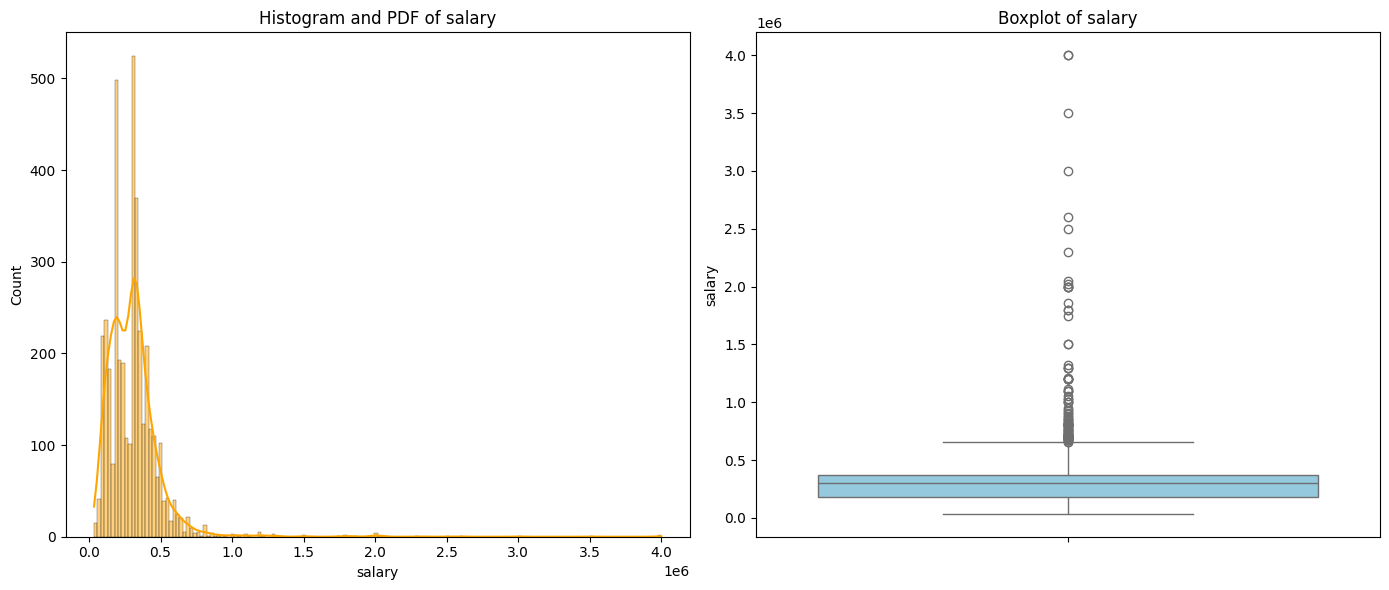

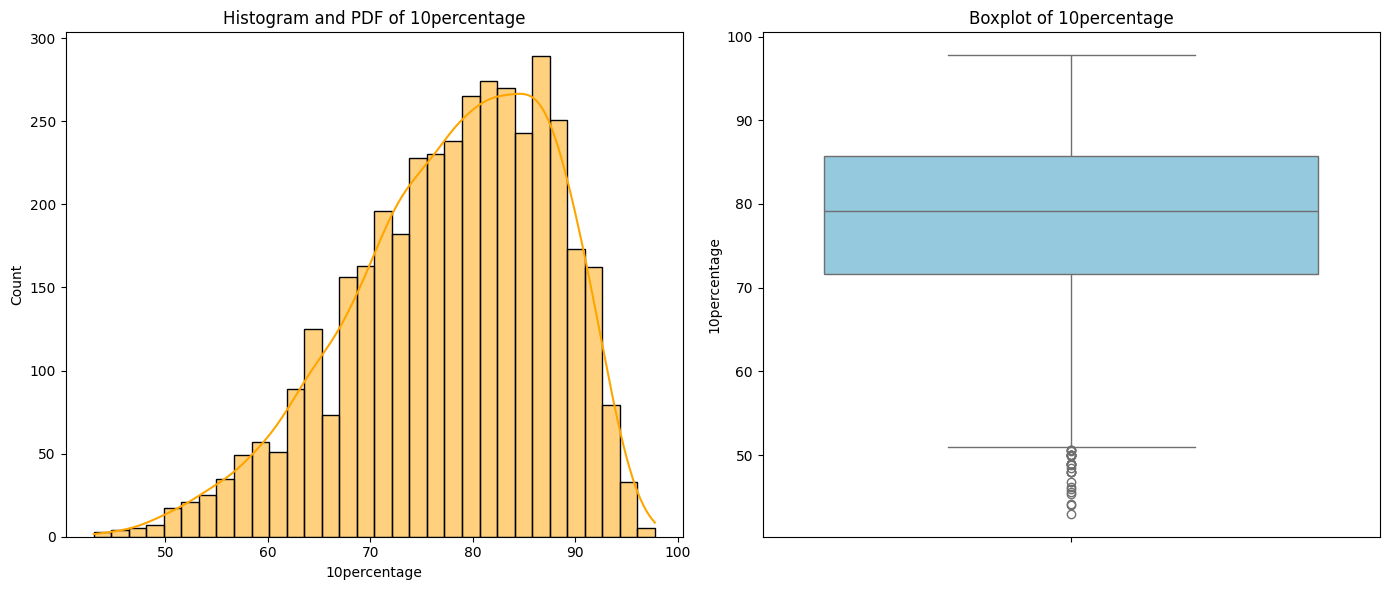

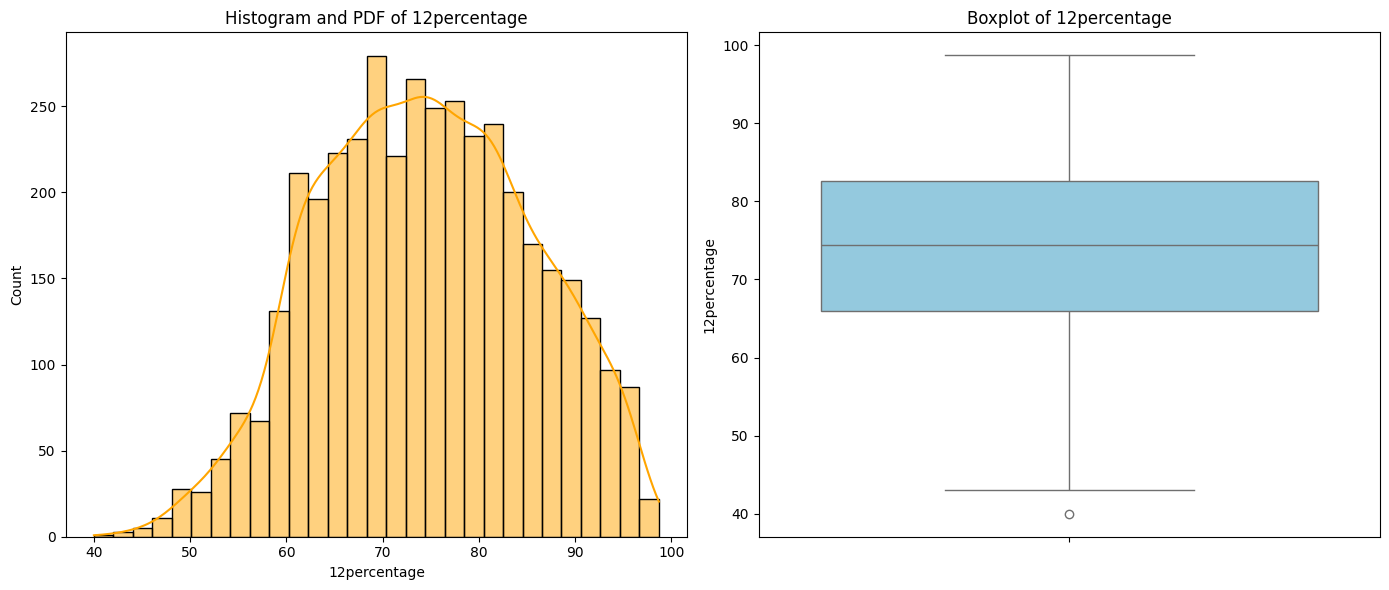

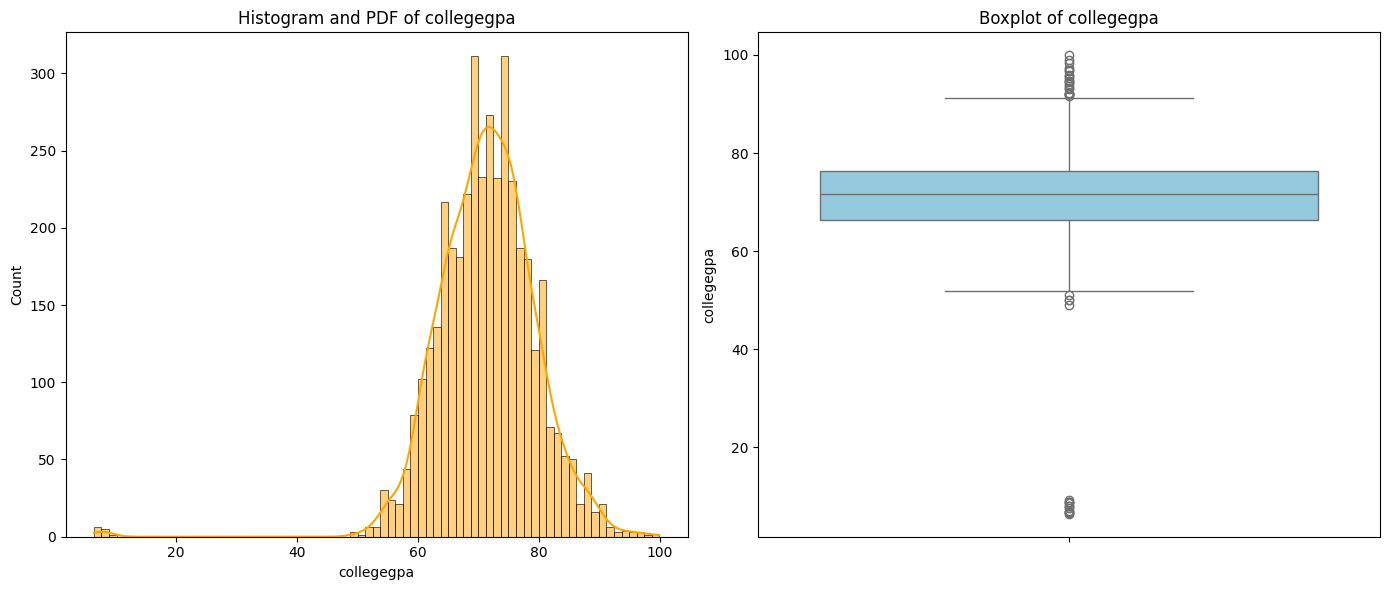

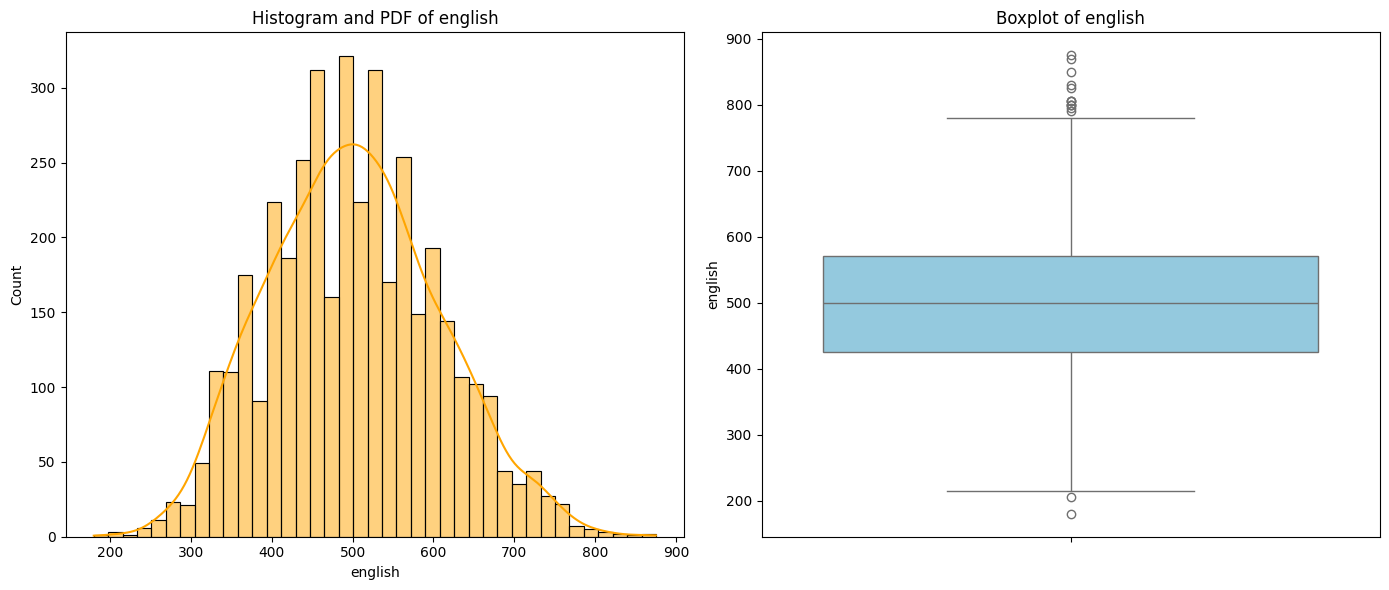

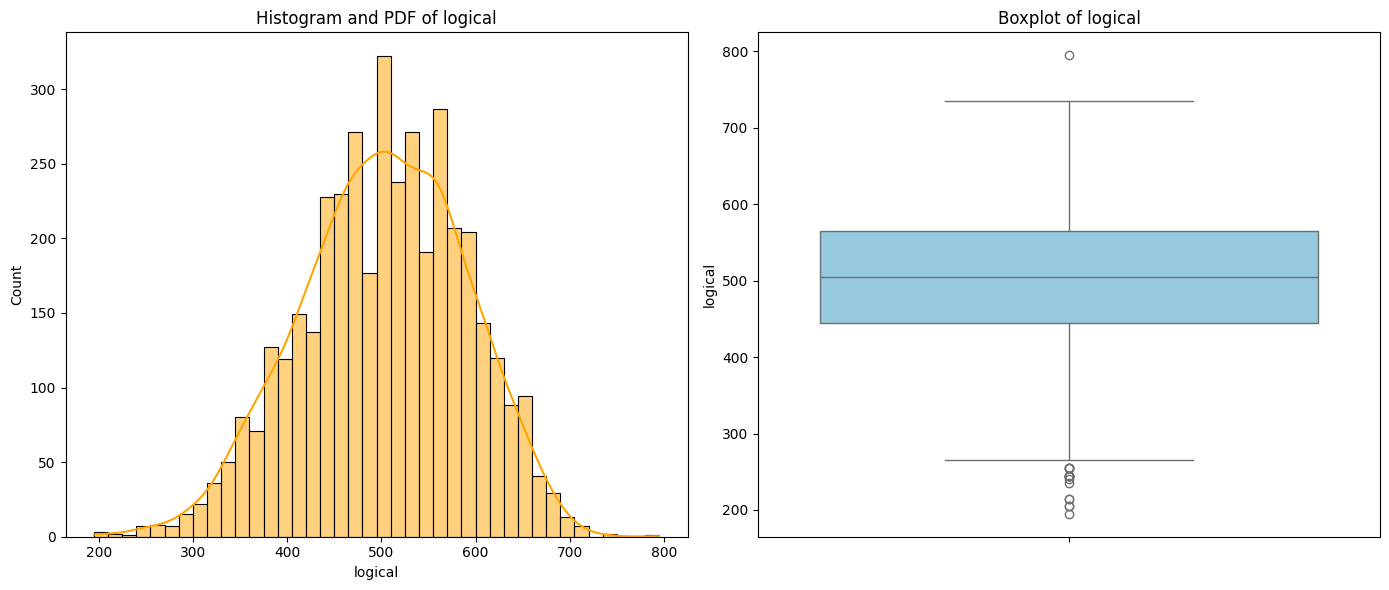

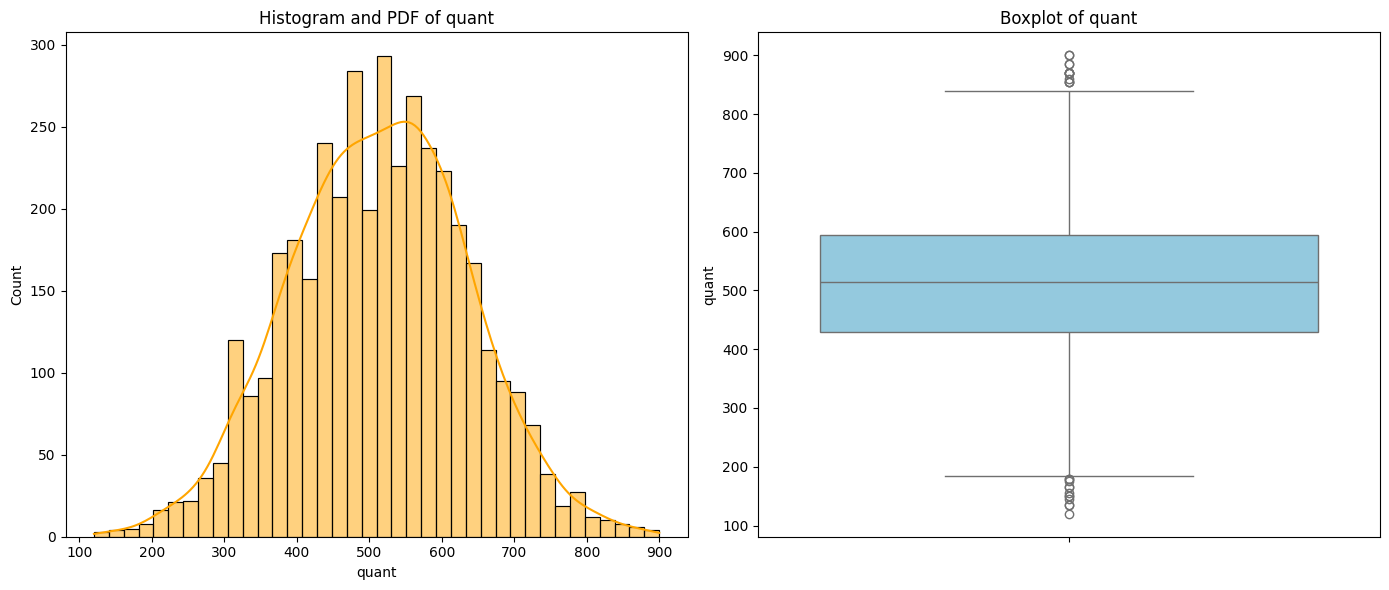

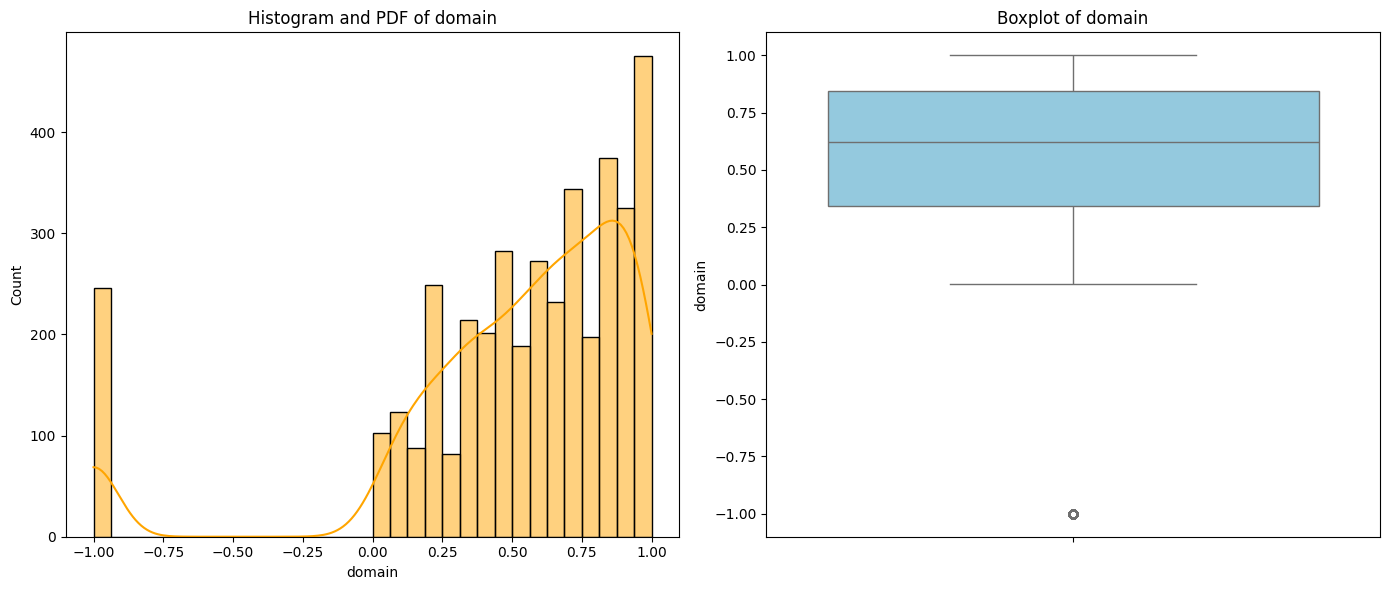

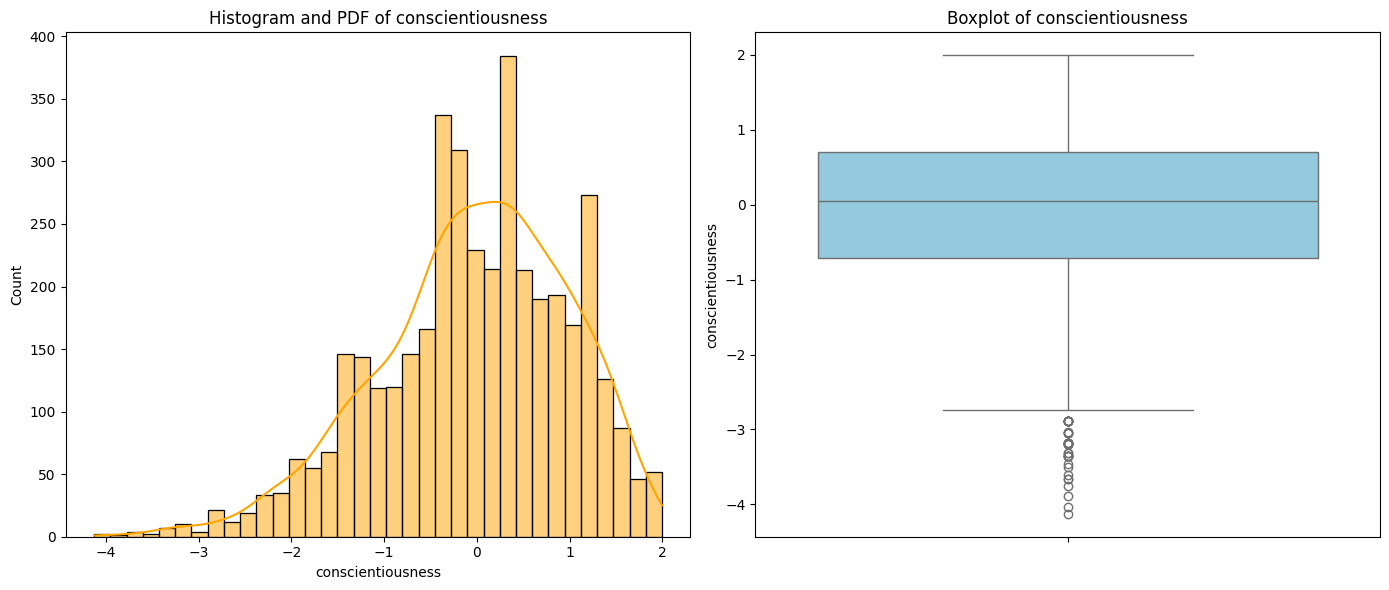

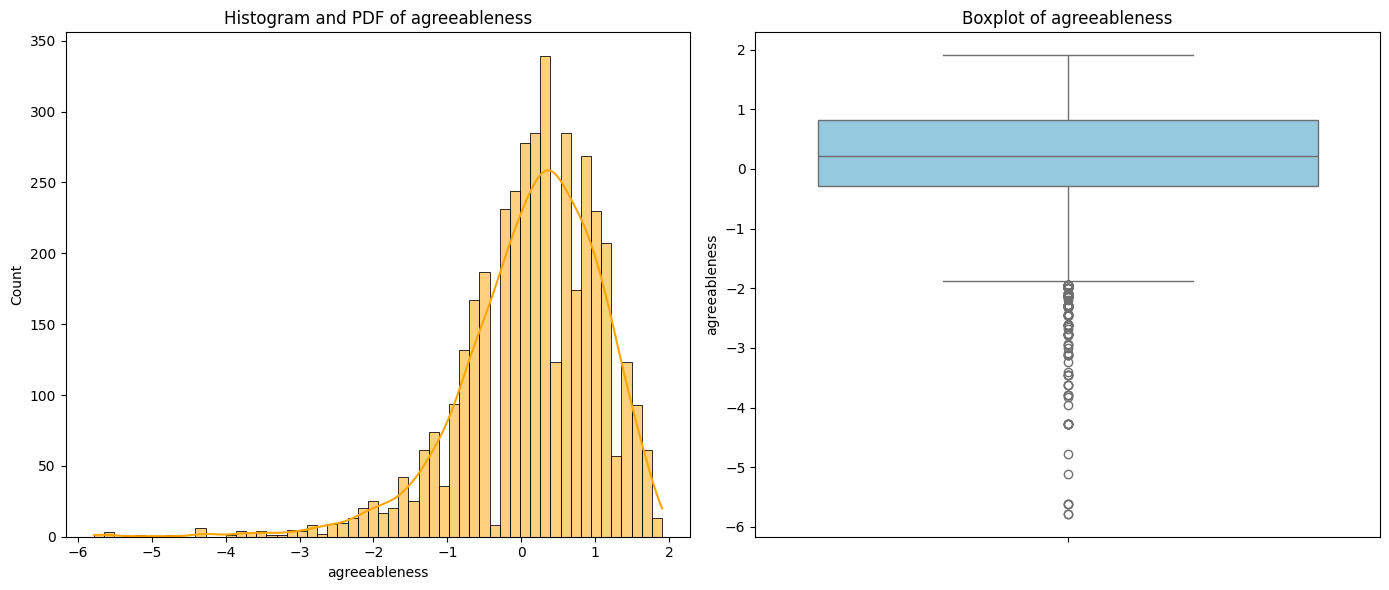

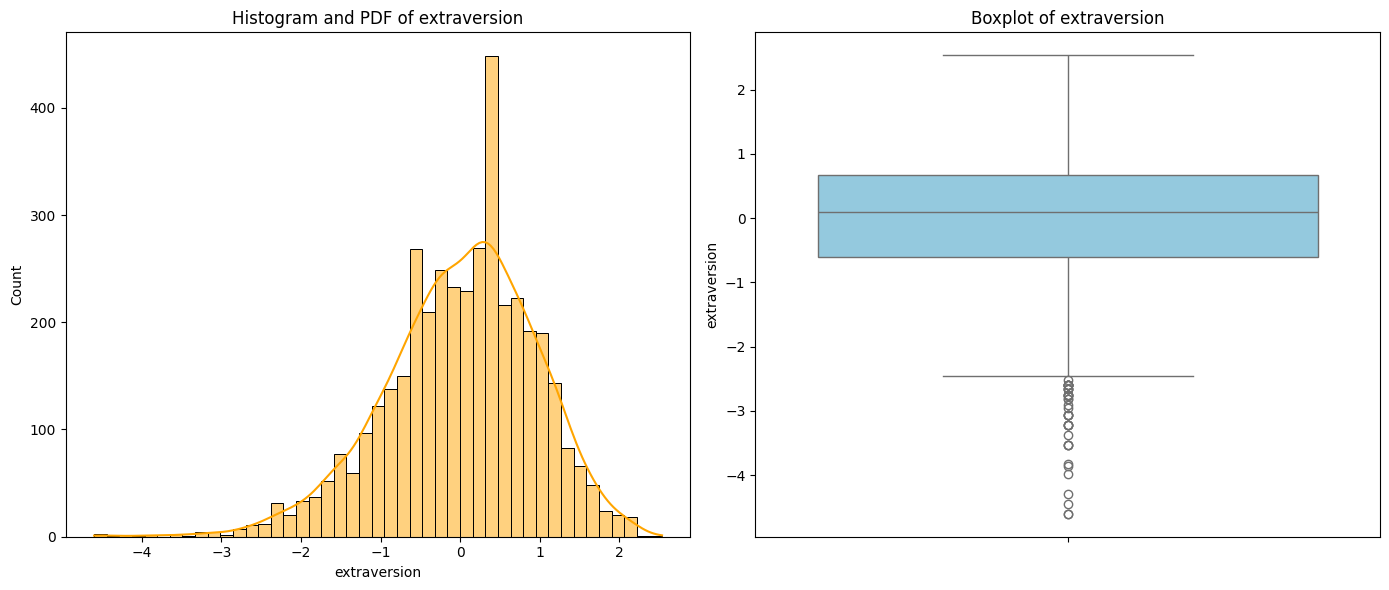

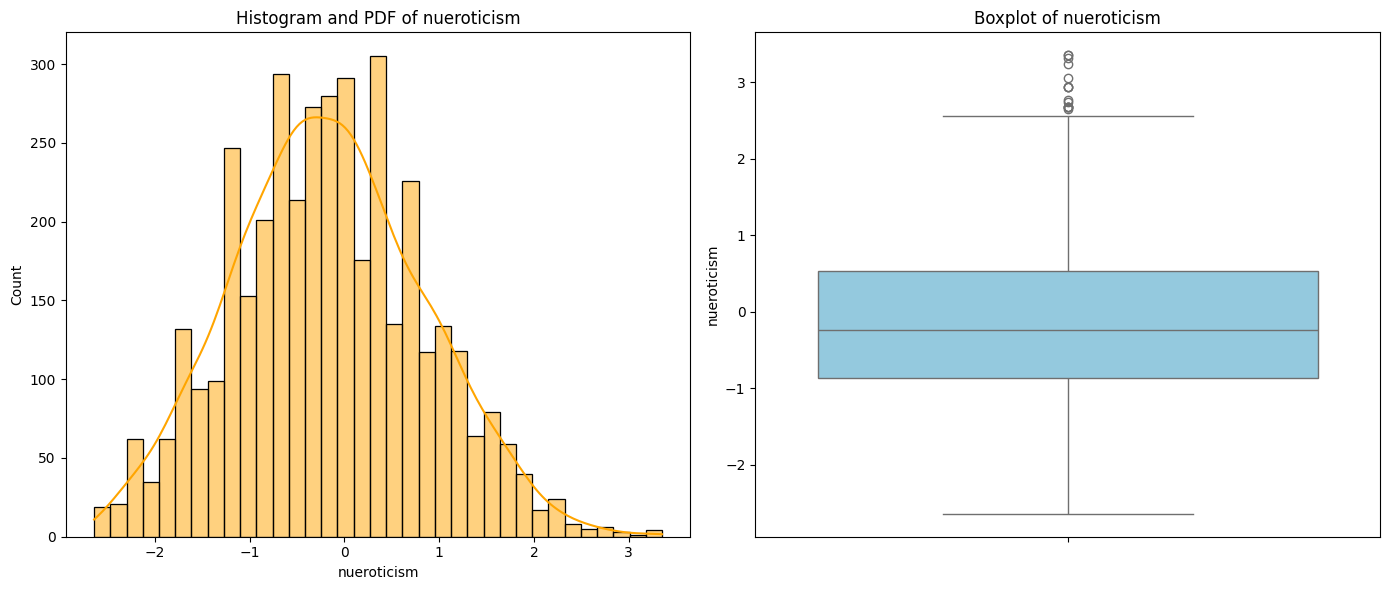

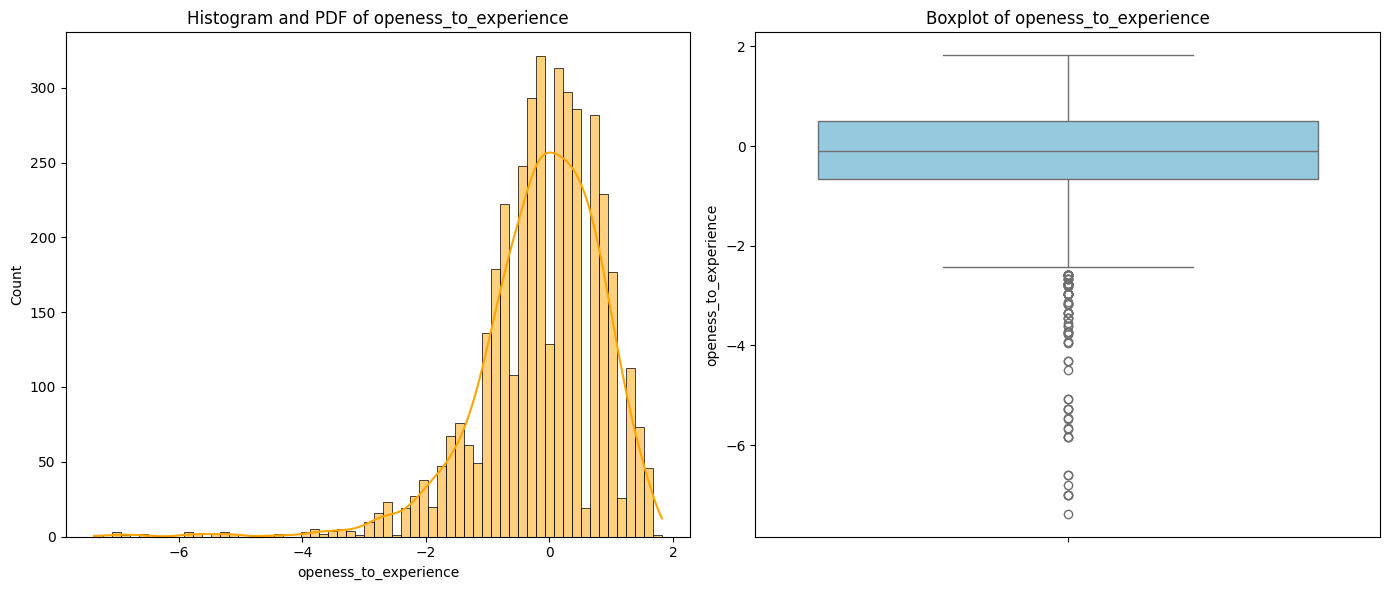

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


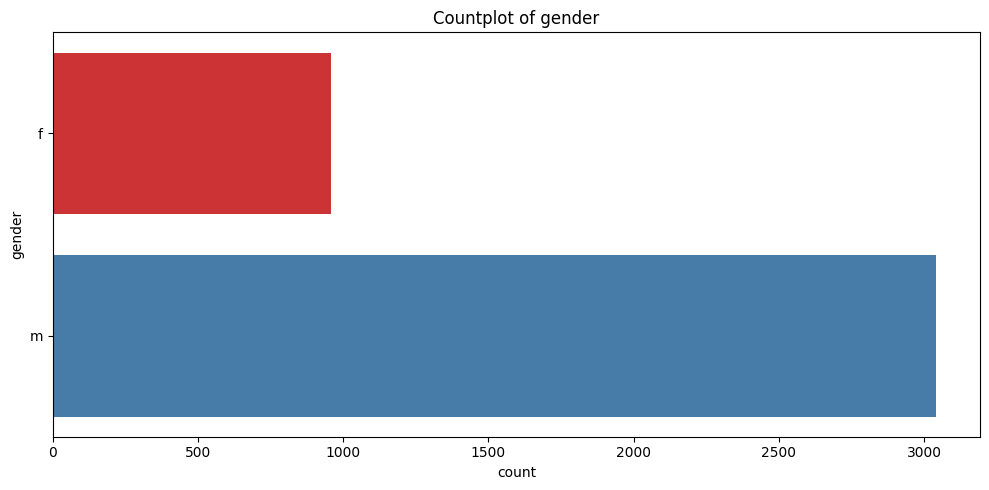

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


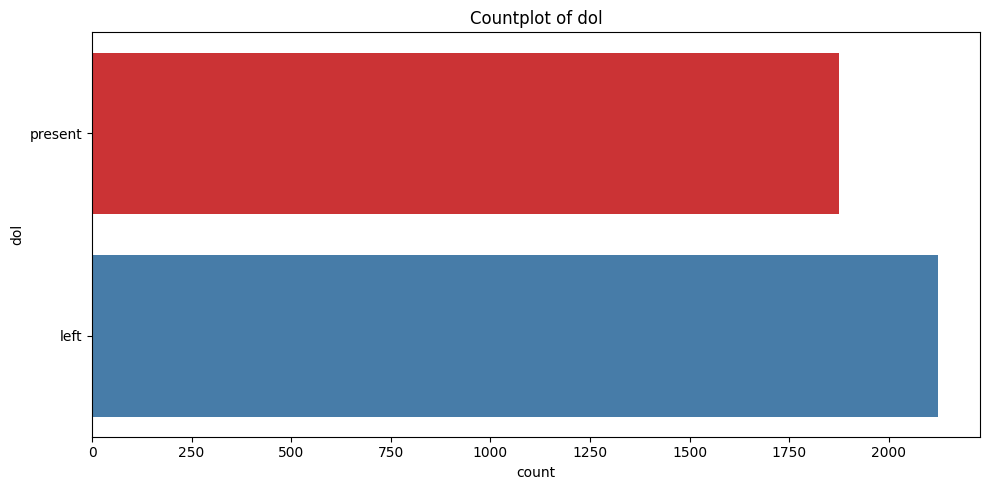

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


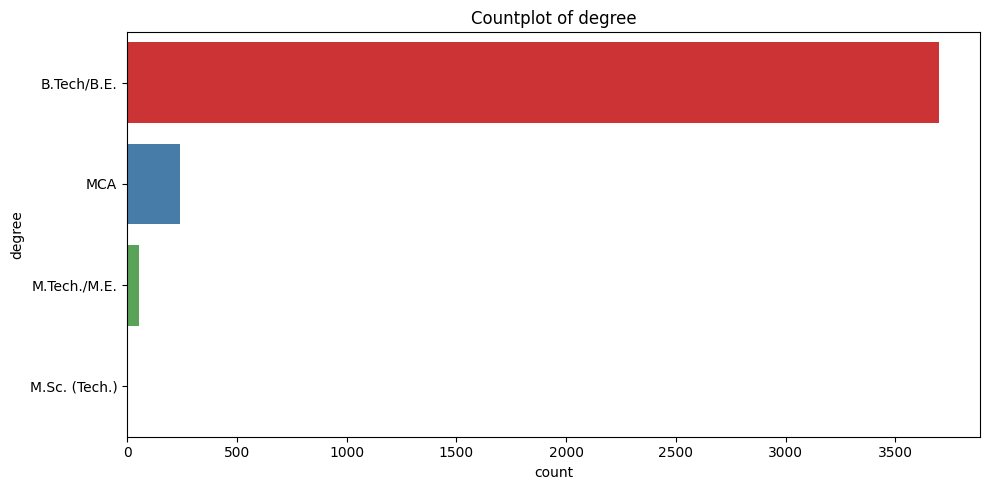

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


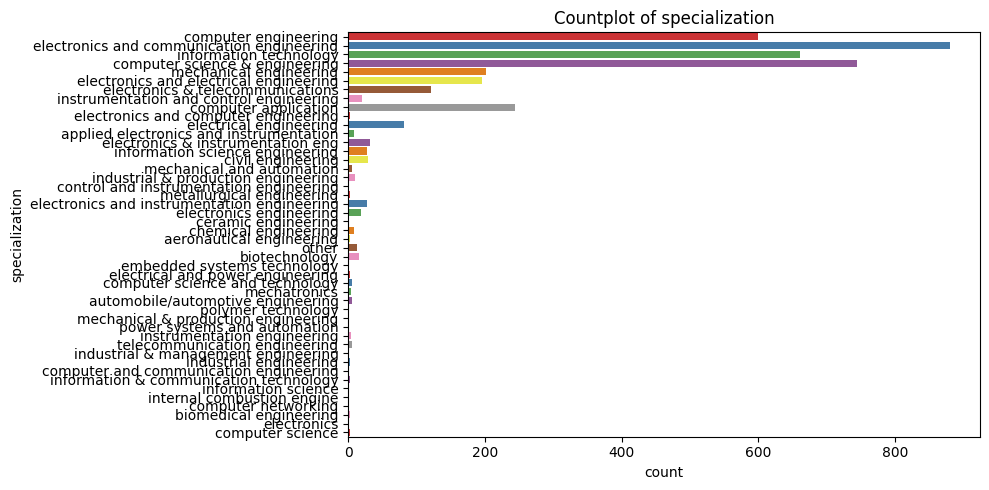

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


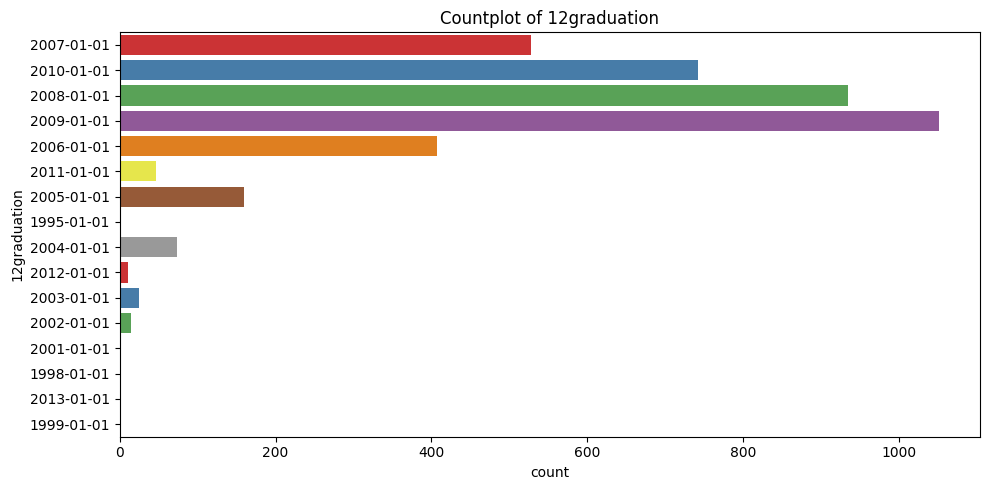

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


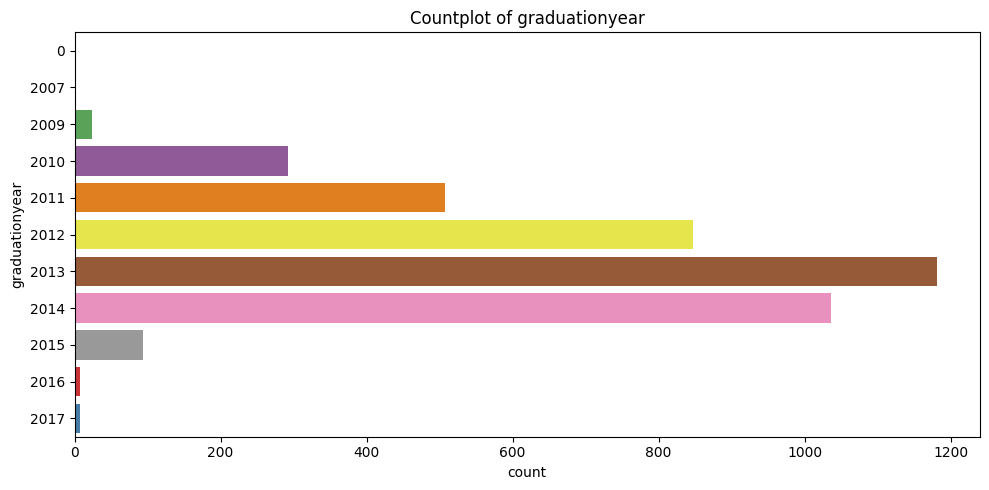

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


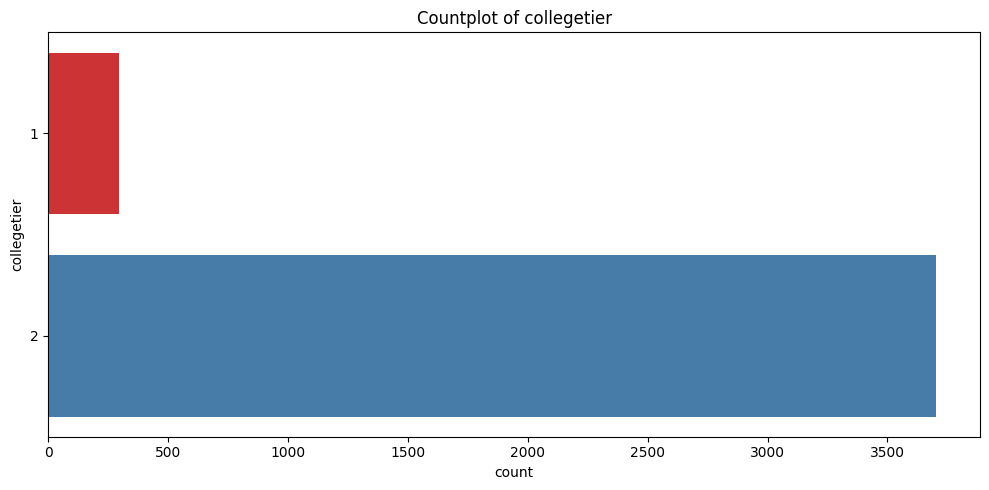

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


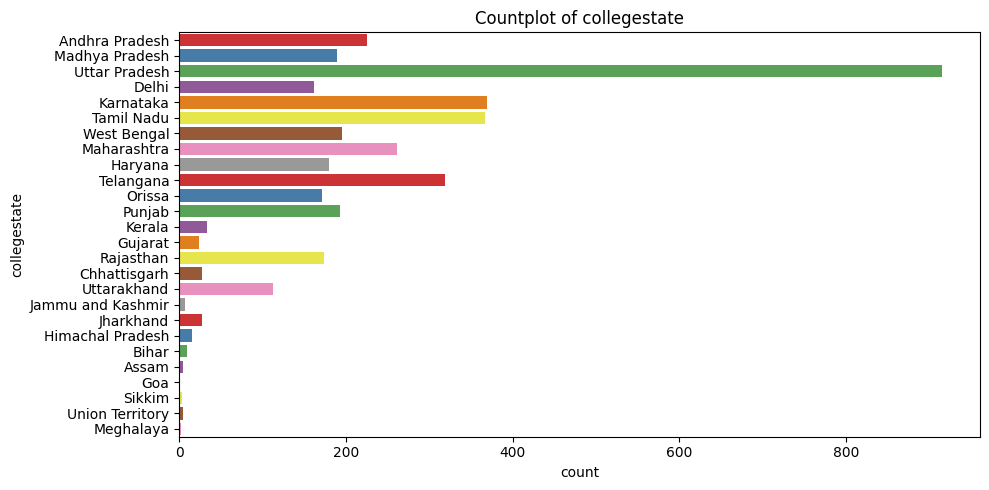

C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\2652770545.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='Set1')


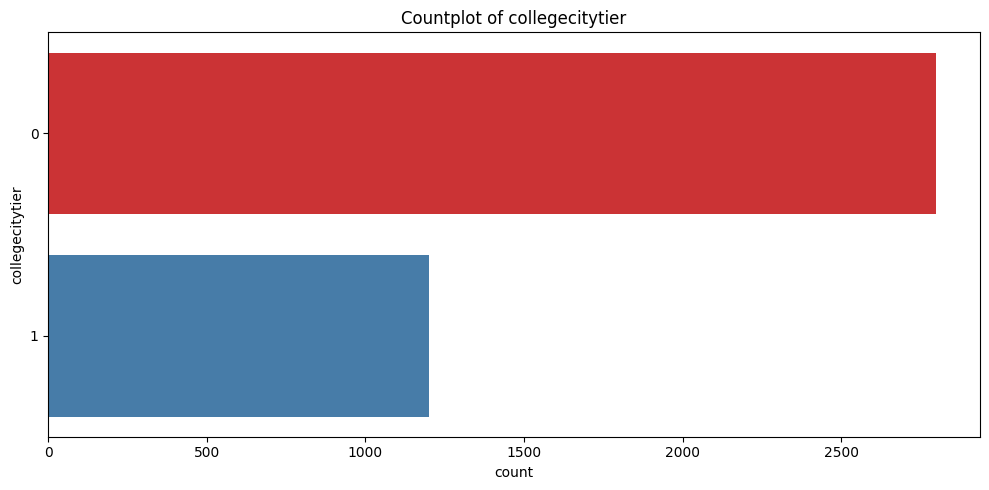

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_univariate_analysis(df, numerical_columns):
    for col in numerical_columns:
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))        
        sns.histplot(df[col], kde=True, ax=axs[0], color='orange')
        axs[0].set_title(f'Histogram and PDF of {col}')        
        sns.boxplot(df[col], ax=axs[1], color='skyblue')
        axs[1].set_title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

def plot_categorical_analysis(df, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=df[col], palette='Set1')
        plt.title(f'Countplot of {col}')
        plt.tight_layout()
        plt.show()

numerical_columns = ['salary', '10percentage', '12percentage', 'collegegpa','english', 'logical', 'quant','domain',
                     'conscientiousness','agreeableness', 'extraversion', 'nueroticism','openess_to_experience']

categorical_columns = ['gender','dol', 'degree', 'specialization','12graduation', 'graduationyear',
                       'collegetier', 'collegestate','collegecitytier']

plot_univariate_analysis(df, numerical_columns)
plot_categorical_analysis(df, categorical_columns)


# Step 4: Bivariate Analysis
-Numerical vs Numerical

using scatter plots,pair plots etc to visualize relationships between two numerical variables.

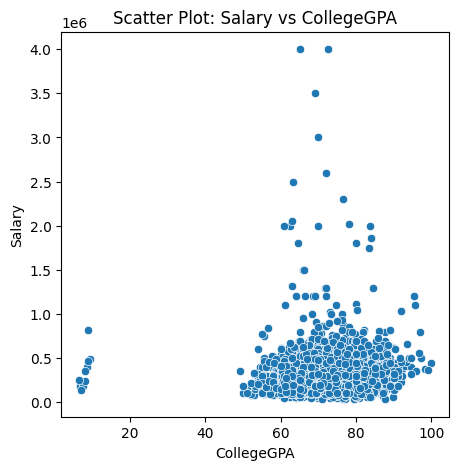

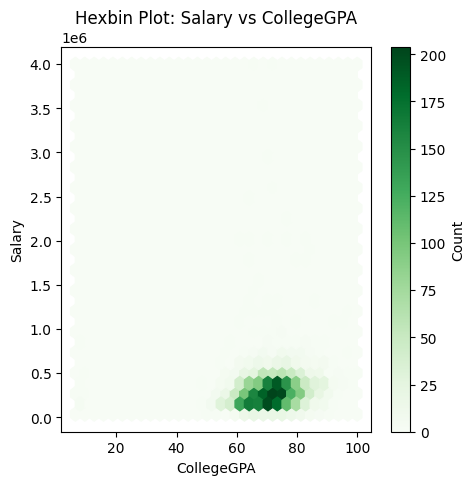

In [11]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='collegegpa', y='salary', data=df)
plt.title('Scatter Plot: Salary vs CollegeGPA')
plt.xlabel('CollegeGPA')
plt.ylabel('Salary')
plt.show()

# Hexbin Plot: Salary vs CollegeGPA
plt.figure(figsize=(5, 5))
plt.hexbin(df['collegegpa'], df['salary'], gridsize=30, cmap='Greens')
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Salary vs CollegeGPA')
plt.xlabel('CollegeGPA')
plt.ylabel('Salary')
plt.show()

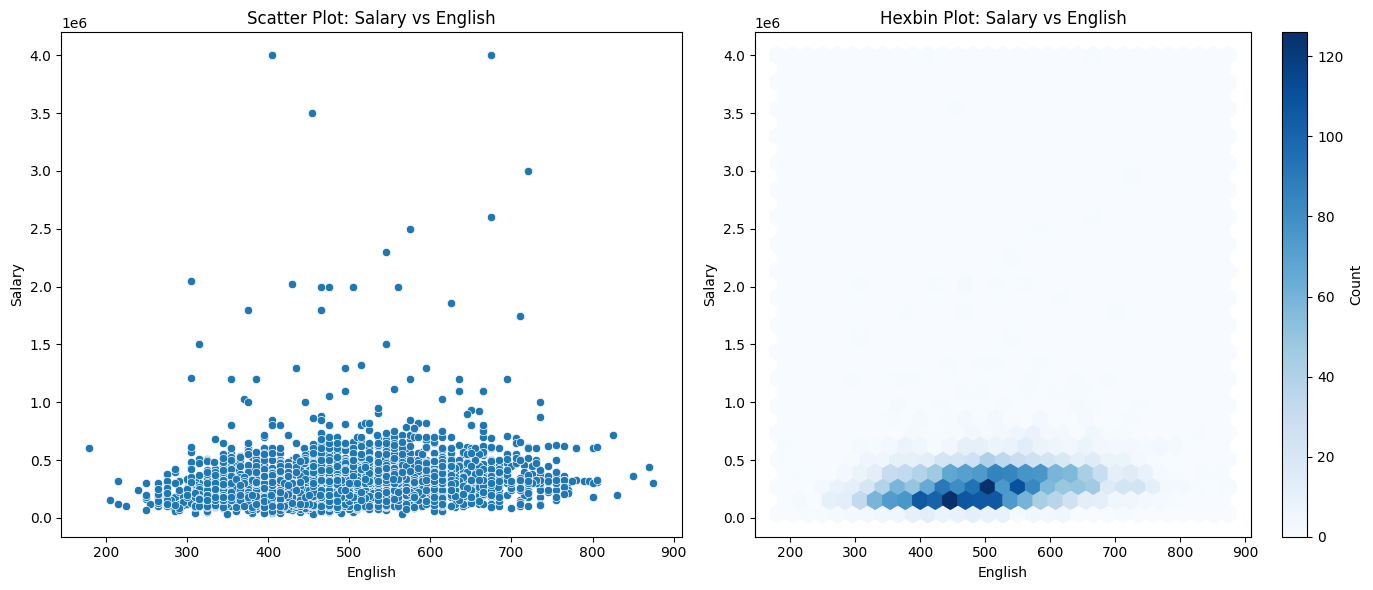

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='english', y='salary', data=df, ax=axes[0])
axes[0].set_title('Scatter Plot: Salary vs English')
axes[0].set_xlabel('English')
axes[0].set_ylabel('Salary')

hb = axes[1].hexbin(df['english'], df['salary'], gridsize=30, cmap='Blues')
axes[1].set_title('Hexbin Plot: Salary vs English')
axes[1].set_xlabel('English')
axes[1].set_ylabel('Salary')
fig.colorbar(hb, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

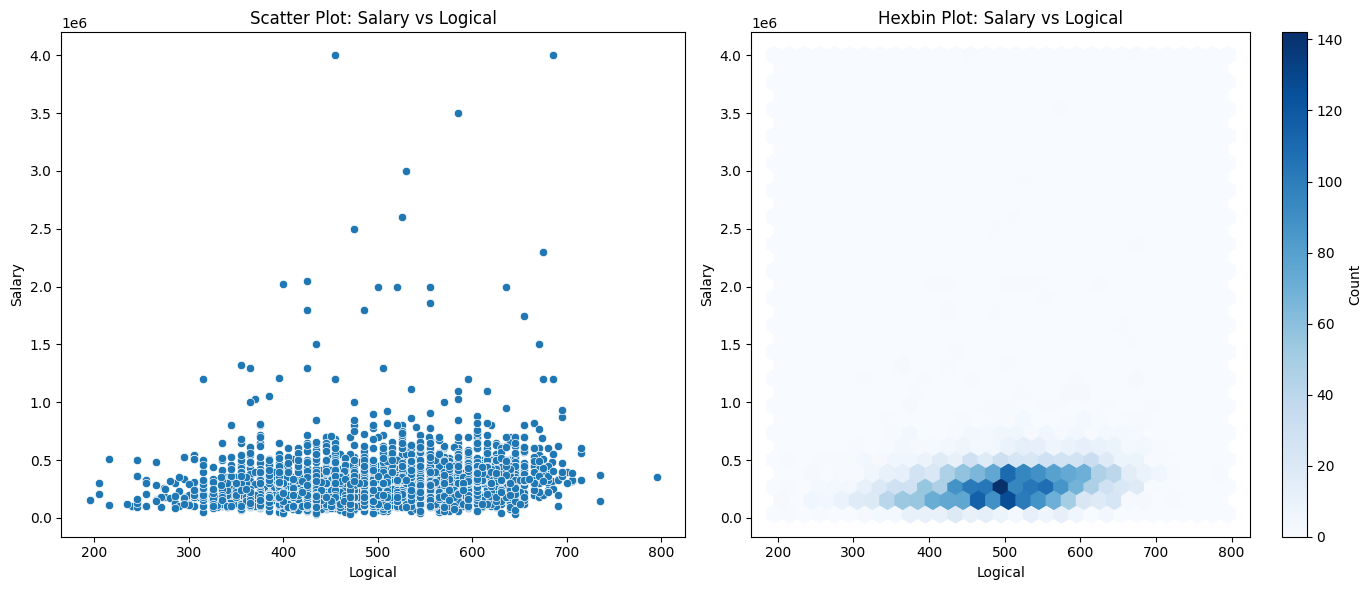

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter Plot: Salary vs Logical
sns.scatterplot(x='logical', y='salary', data=df, ax=axes[0])
axes[0].set_title('Scatter Plot: Salary vs Logical')
axes[0].set_xlabel('Logical')
axes[0].set_ylabel('Salary')

hb = axes[1].hexbin(df['logical'], df['salary'], gridsize=30, cmap='Blues')
axes[1].set_title('Hexbin Plot: Salary vs Logical')
axes[1].set_xlabel('Logical')
axes[1].set_ylabel('Salary')
fig.colorbar(hb, ax=axes[1], label='Count')
plt.tight_layout()
plt.show()

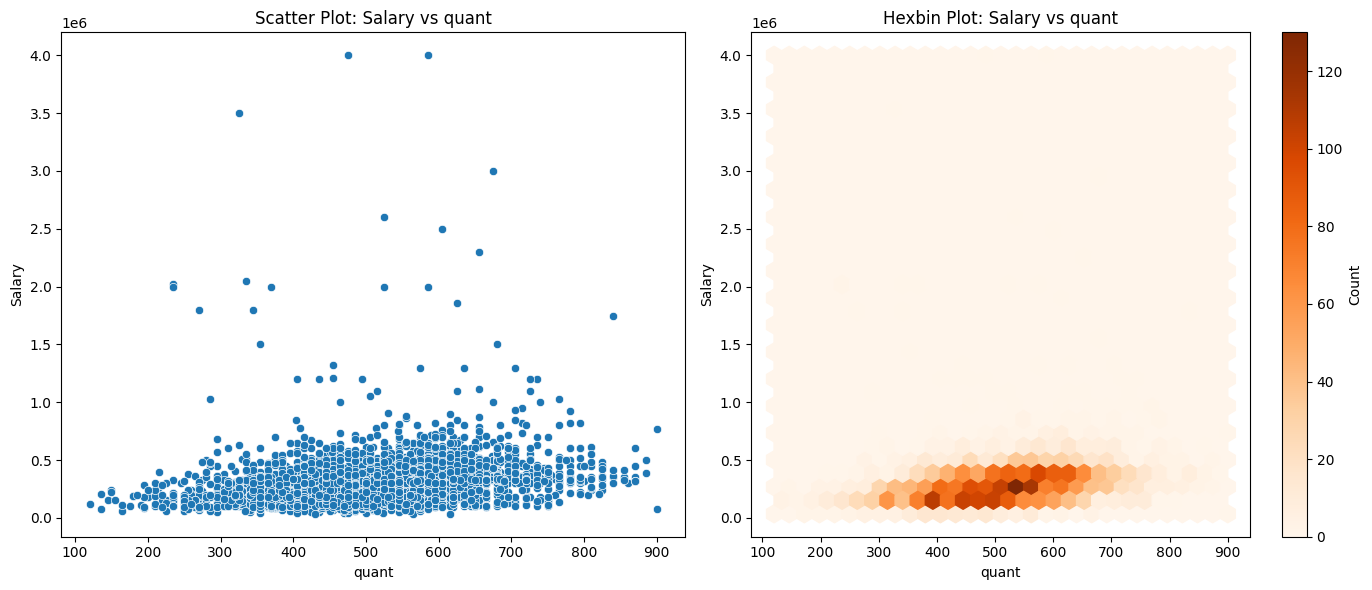

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='quant', y='salary', data=df, ax=axes[0])
axes[0].set_title('Scatter Plot: Salary vs quant')
axes[0].set_xlabel('quant')
axes[0].set_ylabel('Salary')

hb = axes[1].hexbin(df['quant'], df['salary'], gridsize=30, cmap='Oranges')
axes[1].set_title('Hexbin Plot: Salary vs quant')
axes[1].set_xlabel('quant')
axes[1].set_ylabel('Salary')
fig.colorbar(hb, ax=axes[1], label='Count')
plt.tight_layout()
plt.show()

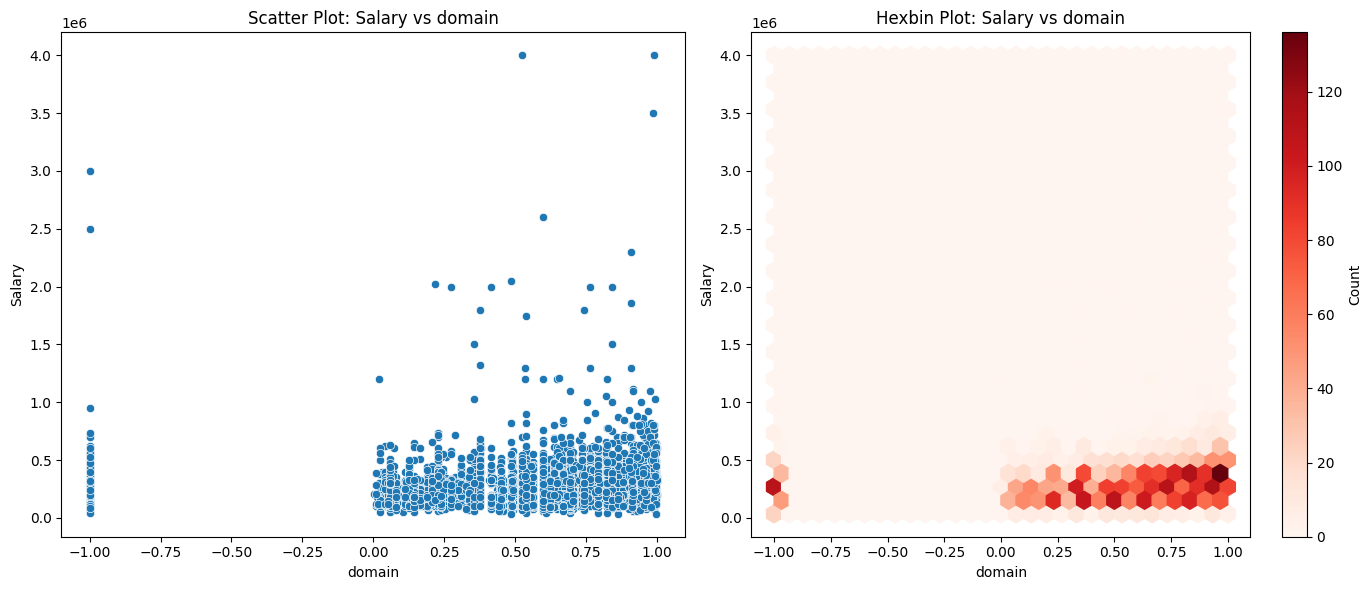

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='domain', y='salary', data=df, ax=axes[0])
axes[0].set_title('Scatter Plot: Salary vs domain')
axes[0].set_xlabel('domain')
axes[0].set_ylabel('Salary')

hb = axes[1].hexbin(df['domain'], df['salary'], gridsize=30, cmap='Reds')
axes[1].set_title('Hexbin Plot: Salary vs domain')
axes[1].set_xlabel('domain')
axes[1].set_ylabel('Salary')
fig.colorbar(hb, ax=axes[1], label='Count')
plt.tight_layout()
plt.show()

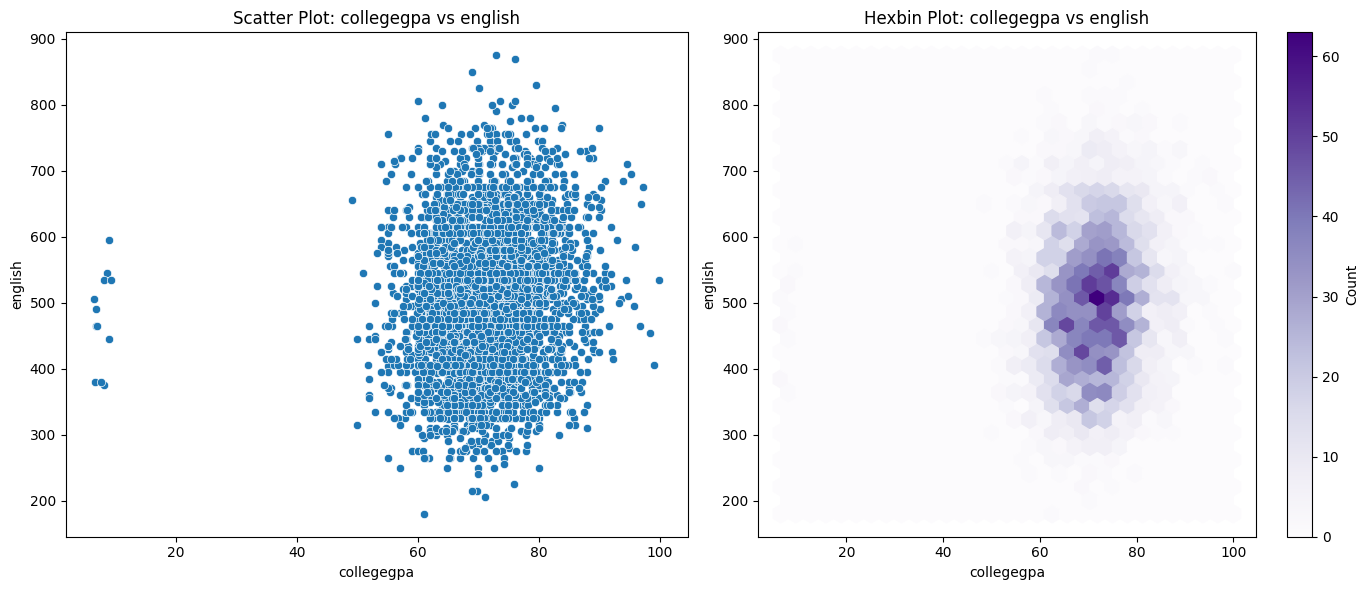

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='collegegpa', y='english', data=df, ax=axes[0])
axes[0].set_title('Scatter Plot: collegegpa vs english')
axes[0].set_xlabel('collegegpa')
axes[0].set_ylabel('english')

hb = axes[1].hexbin(df['collegegpa'], df['english'], gridsize=30, cmap='Purples')
axes[1].set_title('Hexbin Plot: collegegpa vs english')
axes[1].set_xlabel('collegegpa')
axes[1].set_ylabel('english')
fig.colorbar(hb, ax=axes[1], label='Count')
plt.tight_layout()
plt.show()

In [17]:
import numpy as np

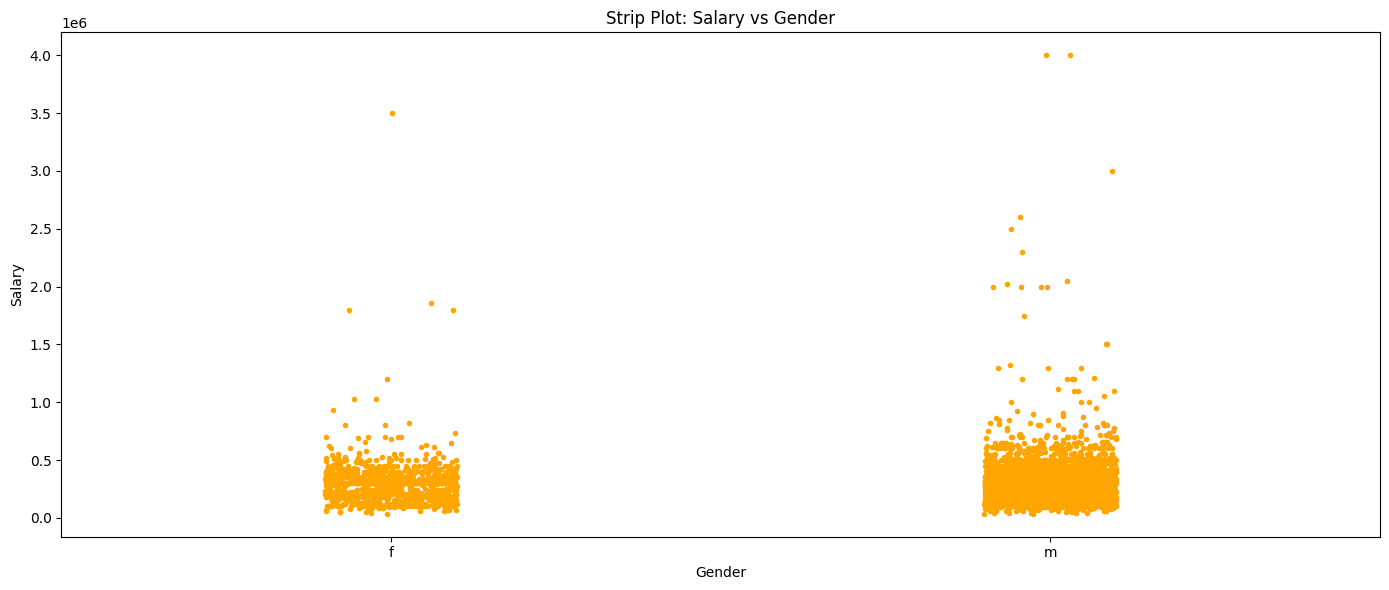

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))  
sns.stripplot(x='gender', y='salary', data=df, ax=axes, color='orange', size=4)
axes.set_title('Strip Plot: Salary vs Gender')
axes.set_xlabel('Gender')
axes.set_ylabel('Salary')

plt.tight_layout()
plt.show()

C:\Users\vaddi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaddi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaddi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaddi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaddi\AppData\Roamin

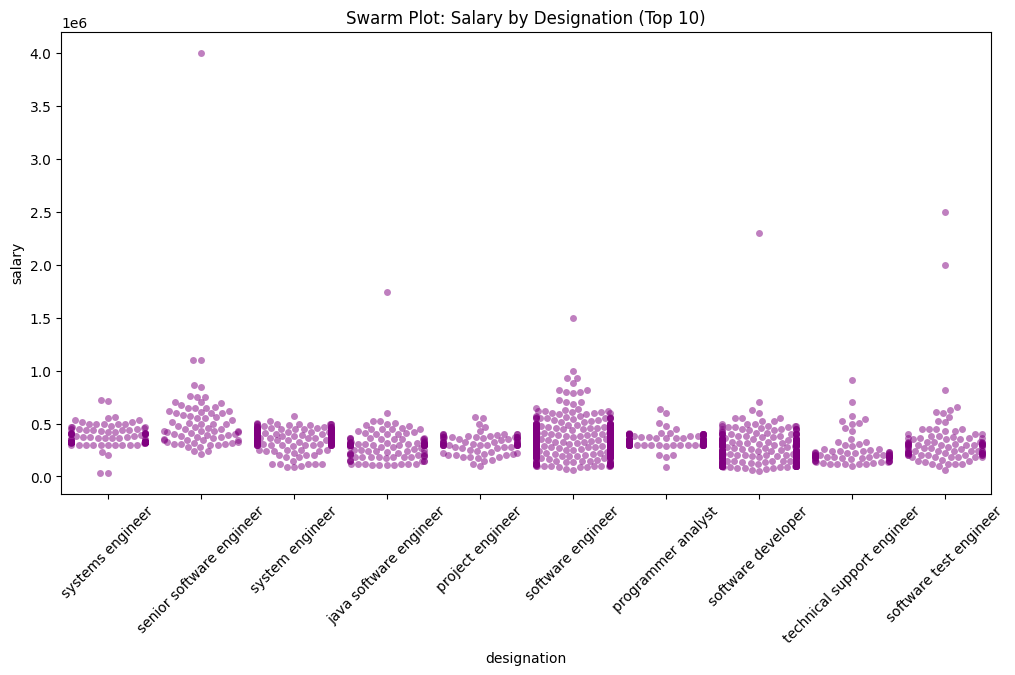

In [31]:

top_designations = df['designation'].value_counts().nlargest(10).index
filtered_df = df[df['designation'].isin(top_designations)]

plt.figure(figsize=(12, 6))
sns.swarmplot(x='designation', y='salary', data=filtered_df, color='purple', alpha=0.5)
plt.title('Swarm Plot: Salary by Designation (Top 10)')
plt.xticks(rotation=45)
plt.show()


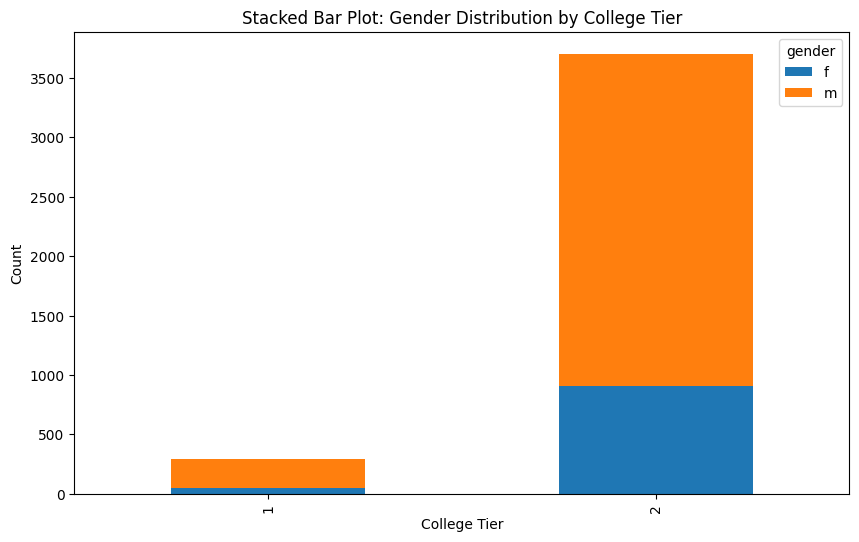

In [32]:

gender_college_counts = df.groupby(['collegetier', 'gender']).size().unstack()
gender_college_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot: Gender Distribution by College Tier')
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.show()


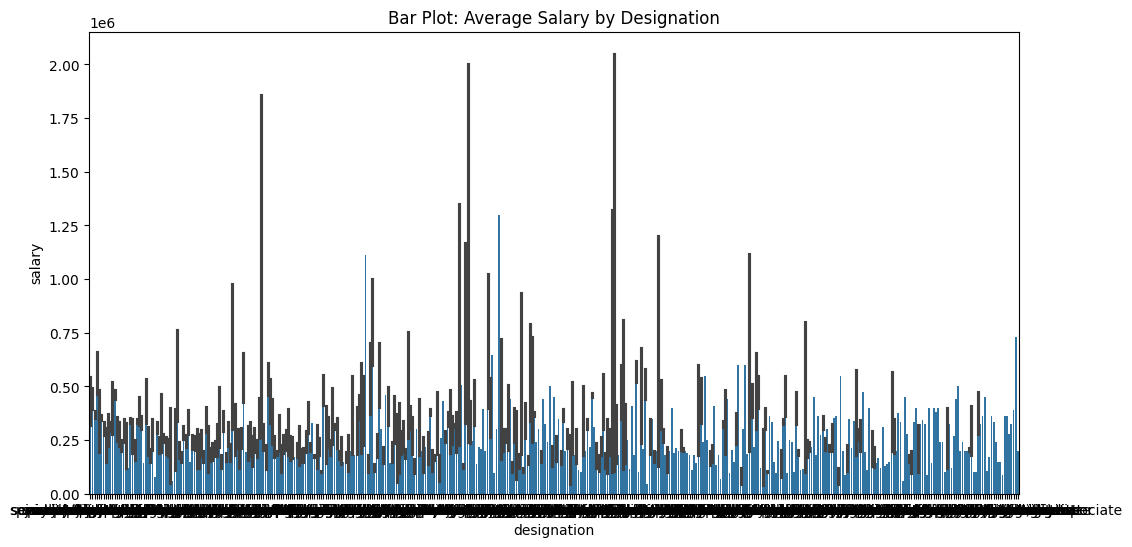

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='designation', y='salary', data=df, estimator=np.mean)
plt.title('Bar Plot: Average Salary by Designation')
plt.show()


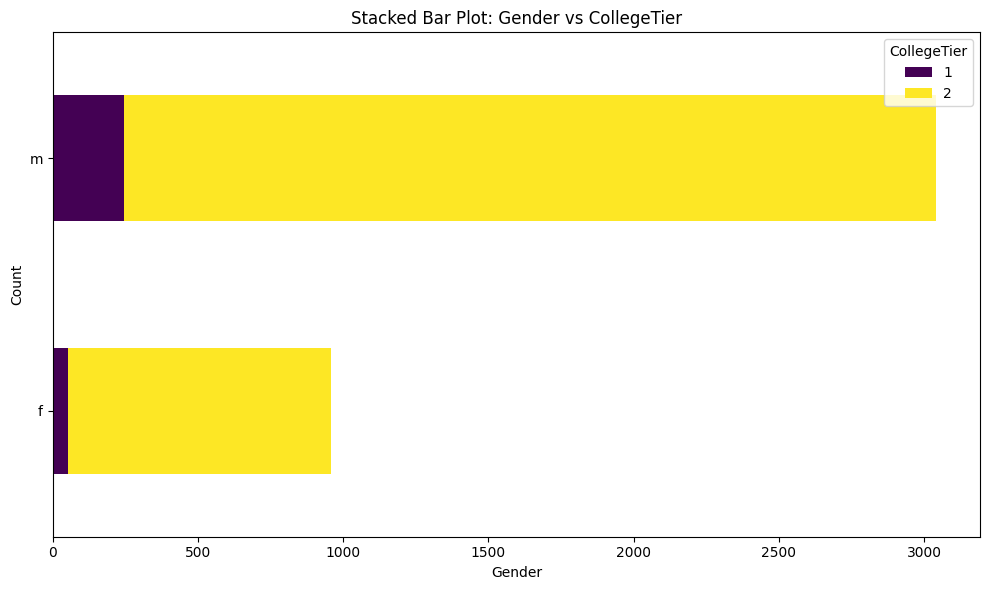

In [33]:

cross_tab = pd.crosstab(df['gender'], df['collegetier'])

cross_tab.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Stacked Bar Plot: Gender vs CollegeTier')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='CollegeTier', loc='upper right')

plt.tight_layout()
plt.show()


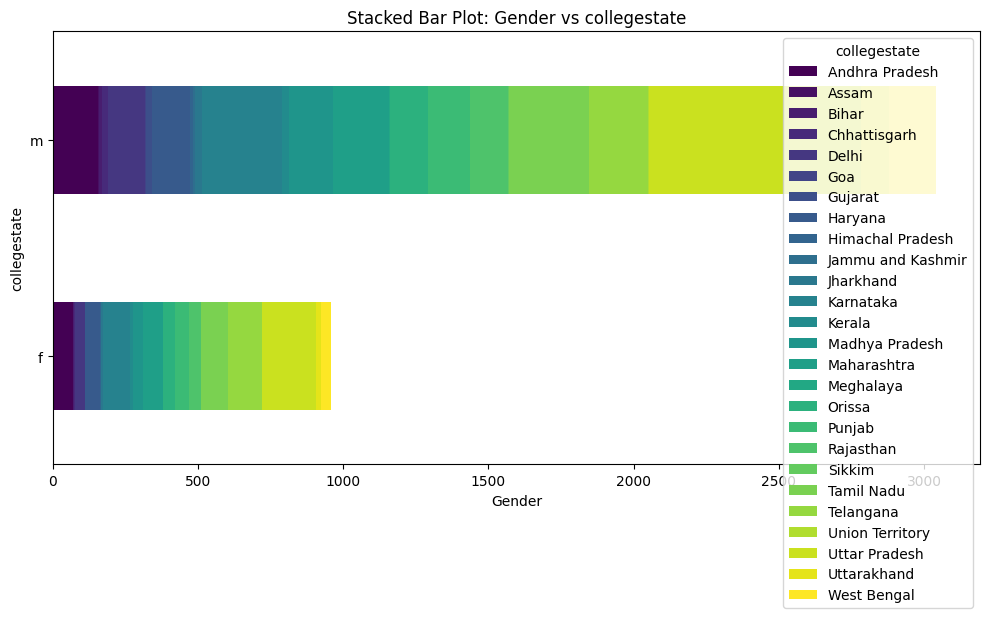

In [34]:

cross_tab = pd.crosstab(df['gender'], df['collegestate'])

cross_tab.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Stacked Bar Plot: Gender vs collegestate')
plt.xlabel('Gender')
plt.ylabel('collegestate')
plt.legend(title='collegestate', loc='upper right')
plt.tight_layout()
plt.show()


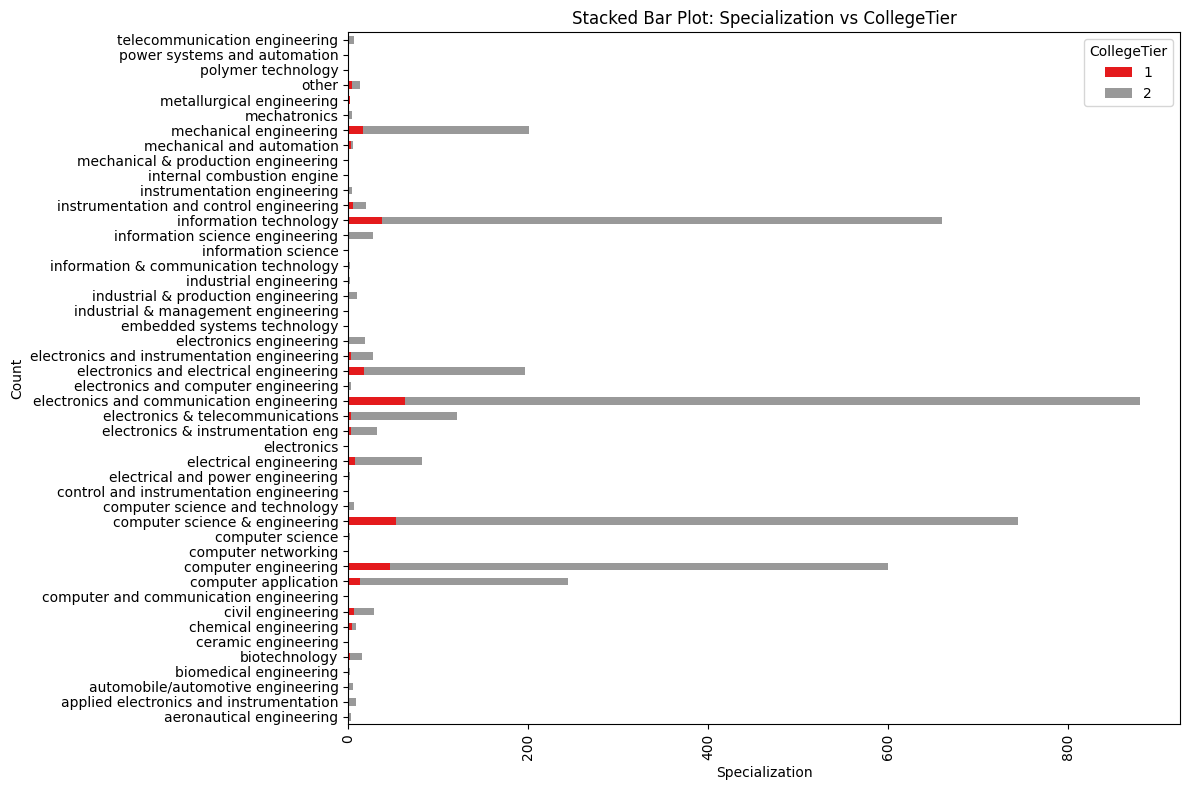

In [35]:

cross_tab = pd.crosstab(df['specialization'], df['collegetier'])

cross_tab.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Set1')

plt.title('Stacked Bar Plot: Specialization vs CollegeTier')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.legend(title='CollegeTier', loc='upper right')
plt.tight_layout()
plt.show()


In [36]:

cross_tab = pd.crosstab(df['designation'], df['specialization'])
cross_tab

specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
designation,,,,,,,,,,,,,,,,,,,,,
.net developer,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
.net web developer,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
account executive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
account manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
admin assistant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web designer and seo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
web developer,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
web intern,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
cross_tab = pd.crosstab(df['jobcity'], df['gender'])
cross_tab

gender,f,m
jobcity,,
Chennai,0,1
Delhi,0,1
Mumbai,0,2
Pune,0,1
ariyalur,0,1
...,...,...
trivandrum,1,1
udaipur,2,0
vapi,0,1


#research step:

Question 1:
Testing the claim from the Times of India article
Steps to Test the Claim:
Filter the Data for the mentioned designations.
Calculate the average salary for these specific roles.
Compare the average salary with the claimed range (2.5 to 3 lakhs)

In [39]:
roles_to_test = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']

df_roles = df[df['designation'].str.lower().isin(roles_to_test)]
average_salary = df_roles['salary'].mean()
print(f"Average Salary for {roles_to_test} roles: {average_salary}")


Average Salary for ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer'] roles: 339792.0433996383


Question 2:
Is there a relationship between Gender and Specialization?
Steps to Test the Relationship:
Create a contingency table showing the counts of each specialization by gender
Perform a Chi-square test to check for independence between the two variables

In [40]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['gender'], df['specialization'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("There is a significant relationship between Gender and Specialization (reject null hypothesis).")
else:
    print("No significant relationship between Gender and Specialization (fail to reject null hypothesis).")

Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is a significant relationship between Gender and Specialization (reject null hypothesis).


Conclusion:
Exploratory Data Analysis:

Salary Distribution: Most employees earn lower salaries, with a few high outliers.
Gender Balance: Gender distribution is nearly equal in the dataset.
Common Job Roles: Software Engineer and Senior Software Engineer are the most frequent designations.
GPA vs Salary: A slight positive correlation exists, suggesting higher GPAs may lead to slightly higher salaries.
Salary Variations: Different job roles show significant salary differences; scatter plots indicate no strong correlation with most numerical factors.

Research Insights:

Average Salary Claim: If the average salary for specific roles falls between 2.5 to 3 lakhs, the claim from the Times of India is supported; otherwise, it is not.
Gender and Specialization: A Chi-square test checks if gender influences specialization choice. A p-value less than 0.05 indicates a significant relationship.

# Step - 7: Bonus - Interesting Conclusions or Research Questions
some additional research questions and analyses to uncover more insights from the dataset:

#Question 1:
Does the level of education (e.g., 10th, 12th, or College GPA) influence salary more significantly?
Objective: To determine which educational stage has the most significant impact on salary.
Analysis Approach:
Perform correlation analysis between 10th percentage, 12th percentage, and College GPA with Salary.
Visualize the relationships using heatmaps to see which education level correlates more strongly with salary.

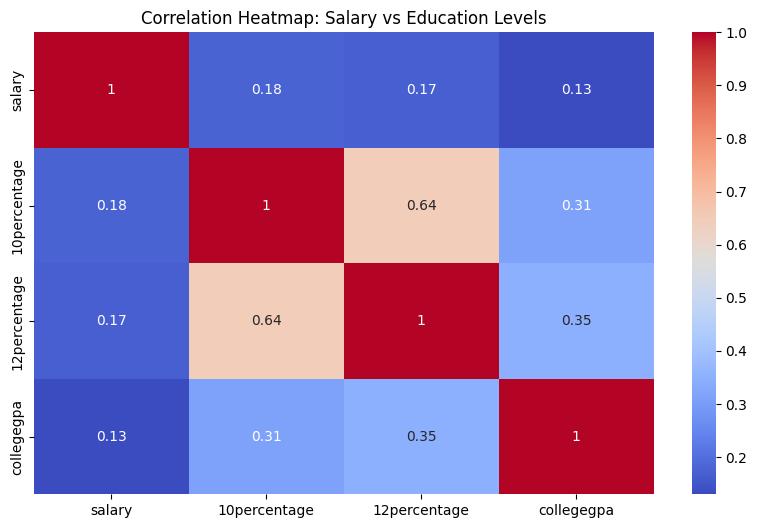

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['salary', '10percentage', '12percentage', 'collegegpa']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Salary vs Education Levels')
plt.show()


Question:
Does the college tier have an impact on the starting salary of graduates?

Hypothesis:
Null Hypothesis: There is no significant difference in starting salaries across different college tiers.
Alternative Hypothesis: There is a significant difference in starting salaries across different college tiers.

F-statistic: 132.78163916226222, p-value: 3.018247144438326e-30


C:\Users\vaddi\AppData\Local\Temp\ipykernel_15712\4131392501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='collegetier', y='salary', data=df, palette='Set2')


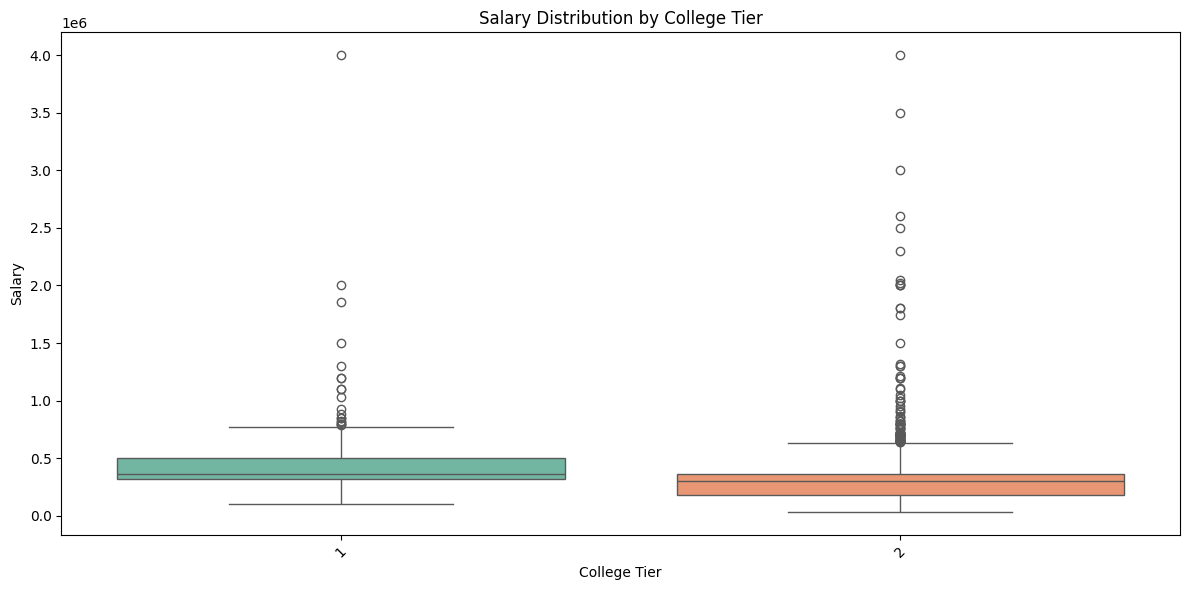

In [46]:
import scipy.stats as stats
salary_groups = [group['salary'].values for name, group in df.groupby('collegetier')]
f_statistic, p_value = stats.f_oneway(*salary_groups)
print(f'F-statistic: {f_statistic}, p-value: {p_value}')

plt.figure(figsize=(12, 6))
sns.boxplot(x='collegetier', y='salary', data=df, palette='Set2')
plt.title('Salary Distribution by College Tier')
plt.xticks(rotation=45)
plt.xlabel('College Tier')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()